# <span style="color:orange"> Laboratorio di Simulazione Numerica </span>
## <span style="color:orange"> Esercitazione 1 </span>

### Paolo Panatti (12606A)

### <font color="blue"> Esercizio 01.1

#### Obiettivo:
Verificare il buon funzionamento del generatore di numeri pseudo-casuali scaricato dal sito Ariel del corso, stimando:
1. $\langle r \rangle = \int_0^1 r dr = 1/2$
2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$

ed eseguendo il test statistico $\chi^2$ di Pearson.

Per valutare correttamente le incertezze statistiche utilizziamo il metodo **data blocking**, che consiste nel dividere il numero totale $M$ di "passi" Monte Carlo con cui si vuole stimare una certa quantità $A$ in $N$ blocchi, con $N < M$. All'interno di ciascun blocco si ha dunque un numero di "passi" pari a $M/N$, che permette di ottenere una stima $A_i$ della quantità $A$ con $i=1,...,N$. Valor medio e incertezza totali sono quindi dati da:
$$ \langle A \rangle \simeq \frac{1}{N} \sum_{i=1}^N A_i \quad \quad \frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
Questo metodo permette di ridurre l'effetto della dipendenza statistica tra le misurazioni, in quanto, se i blocchi sono sufficientemente lunghi, le stime di blocco risultano scorrelate tra loro. Ciò è importante perché il Teorema del Limite Centrale, che ci dice come calcolare l'incertezza, assume che le misure siano statisticamente indipendenti. Il numero di blocchi, o equivalentemente la lunghezza di ciascun blocco, va quindi scelto in modo da garantire questa ipotesi. Chiaramente, le stime di blocco fluttuano molto meno rispetto alle singole misure ma il loro valor medio rimane lo stesso.

#### 1. Stima di $\langle r \rangle$
Per questo primo punto ho generato $M=10^5$ numeri casuali distribuiti uniformemente tra $0$ e $1$ e calcolato valor medio e incertezza utilizzando il metodo data blocking con un numero di blocchi $N=100$. Riporto qui sotto il grafico di valor medio e incertezza progressivi in funzione del numero di "lanci".

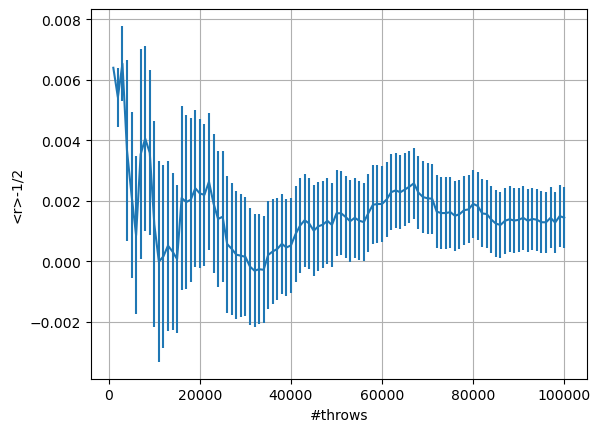

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M, N = np.loadtxt("Es1/data_1.dat", max_rows=1, usecols=(0,1), delimiter=' ', unpack='true')
L = int(M/N)
x = np.arange(N)+1
x *= L

sum_prog, err_prog = np.loadtxt("Es1/data_1.dat", skiprows=1, usecols=(0,1), delimiter=' ', unpack='true')
plt.errorbar(x,sum_prog-0.5,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()

Come ci aspettavamo, all'aumentare del numero di "lanci" $\langle r \rangle - 1/2$ converge a $0$ e l'incertezza rispecchia nel modo giusto le fluttuazioni di questa quantità. In funzione del numero di blocchi, l'incertezza progressiva decresce come $\frac{1}{\sqrt{N}}$.

#### 2. Stima di $\sigma^2$
La stima della varianza si ottiene stimando il valor medio di $(r-1/2)^2$, dove $r$ è un numero casuale distribuito uniformemente tra $0$ e $1$. Anche in questo caso ho scelto $M=10^5$ e $N=100$.

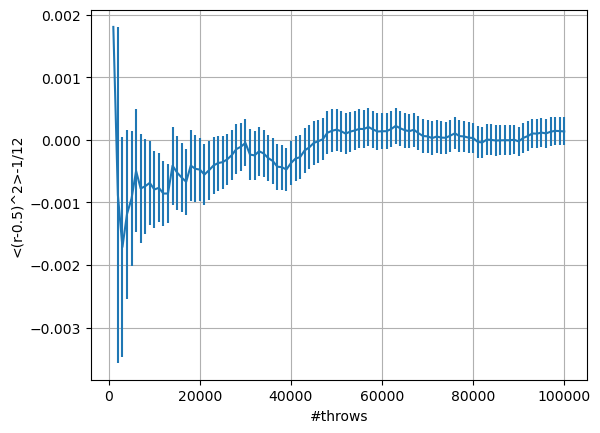

In [48]:
sum_prog, err_prog = np.loadtxt("Es1/data_2.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.errorbar(x,sum_prog-1/12,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

Dal grafico si osserva che, all'aumentare del numero di "lanci", la stima converge al valore aspettato, ossia $1/12$.

#### Test di Pearson
Il test di Pearson serve a verificare che i numeri $r$ provengano da una distribuzione uniforme, rigettando l'ipotesi che questo non sia vero. In statistica, infatti, non è possibile dimostrare che un insieme di numeri casuali provenga da una particolare distribuzione, ma quello che si può fare è soltanto stimare la probabilità che l'insieme non provenga dalla distribuzione in questione.

Per effettuare il test, ho suddiviso l'intervallo $\left[0,1\right]$ in $M=10^2$ sottointervalli identici e ripetuto per 100 volte il calcolo della variabile $\chi^2$, data da:
$$ \chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i} = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M} $$ 
utilizzando $n=10^4$ numeri casuali per volta ($n_i$ rappresenta il numero di eventi osservati in ciascun sottointervallo).

Con i $100$ valori ottenuti ho costruito il seguente istogramma:

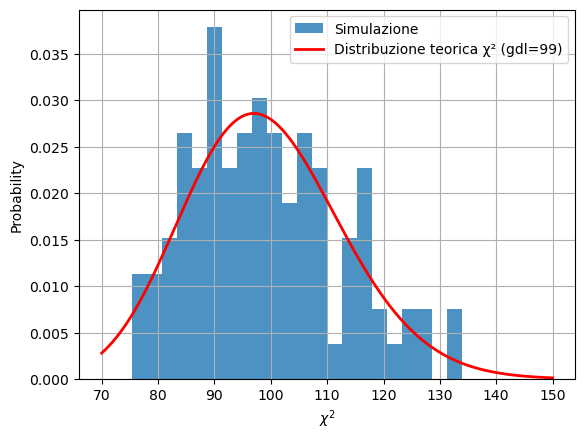

In [78]:
from scipy.stats import chi2

chi2_data = np.loadtxt("Es1/chi2.dat", unpack='true')

n_bins = 30
n, bins, patches = plt.hist(chi2_data, n_bins, density=True, range=(70,150), alpha=0.8, label='Simulazione')

dof = 99
x = np.linspace(70, 150, 1000)
pdf = chi2.pdf(x, dof)
plt.plot(x, pdf, 'r-', lw=2, label=f'Distribuzione teorica χ² (gdl={dof})')

plt.xlabel(r'$\chi^2$')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

I valori di $\chi^2$ sono tutti abbastanza vicini a $100$, come ci aspettiamo dal momento che in media $(n_i - n/M)^2 \simeq n/M$. Confrontando l'istogramma ottenuto con la distribuzione di probabilità esatta della variabile $\chi^2$ (in questo caso il numero di gradi di libertà è pari a $99$), vediamo che si sovrappongono piuttosto bene e perciò possiamo concludere che il nostro generatore è un buon generatore di numeri casuali.

### <font color="blue"> Esercizio 01.2

#### Obiettivo:
- Estendere il generatore di numeri casuali aggiungendo la distribuzione esponenziale $p(x) = \lambda e^{-\lambda x}$ con $x \in \left[ 0, \infty \right]$ e la distribuzione di Cauchy-Lorentz $p(x) = \frac{1}{\pi} \frac{\Gamma}{\left(x-\mu\right)^2+\Gamma^2}$ con $x \in \left[ -\infty, \infty \right]$
- Verificare il Teorema del Limite Centrale

#### Metodo di inversione della distribuzione cumulativa
Uno dei metodi utilizzati per campionare una generica distribuzione di probabilità $p(x)$ partendo da numeri casuali uniformemente distribuiti nell'intervallo $\left[0,1\right)$ è quello di inversione della funzione cumulativa. Secondo questo metodo, data una distribuzione di probabilità $p(x)$ qualsiasi con funzione cumulativa $F(x) = \int_{-\infty}^x p(x') dx'$, se $y$ è un numero casuale distribuito uniformemente tra $0$ e $1$ allora $x=F^{-1}(y)$ è un numero casuale distribuito secondo la distribuzione $p(x)$. Ovviamente il metodo è applicabile a patto che la funzione cumulativa sia invertibile.

In particolare, seguendo questi passaggi nel caso delle distribuzioni esponenziale e di Cauchy-Lorentz si arriva a:
- Distribuzione esponenziale: $x = -\frac{1}{\lambda} \ln(1-y)$
- Distribuzione di Cauchy-Lorentz: $x = \mu + \Gamma \tan\left[\pi(y-\frac{1}{2})\right]$

Ho quindi modificato la classe `Random` aggiungendo i due metodi `Exp()` e `Cauchy()` che implementano rispettivamente le due espressioni appena mostrate.

#### Teorema del Limite Centrale
Date $N$ variabili casuali $x_1,...,x_N$ indipendenti e identicamente distribuite con valor medio $\mu$ e varianza $\sigma^2$ **finita**, nel limite $N \to \infty$ la variabile casuale $A_N = \frac{1}{N} \sum_{i=1}^N x_i$ segue una distribuzione Gaussiana con valor medio $\mu$ e varianza $\frac{\sigma^2}{N}$ (oppure equivalentemente la variabile casuale $S_N = \sum_{i=1}^N x_i$ segue una distribuzione Gaussiana con valor medio $\mu N$ e varianza $N \sigma^2$).

Per verificare il teorema ho calcolato la variabile $A_N$ $10^4$ volte per diversi valori di $N$ ($N=1,2,10,100$), campionando la variabile $x_i$ tramite il lancio prima di un dado uniforme, poi di un dado esponenziale (con $\lambda = 1$) e infine di un dado Lorentziano (con $\mu = 0$ e $\Gamma = 1$). Con i valori ottenuti ho riempito i seguenti istogrammi:

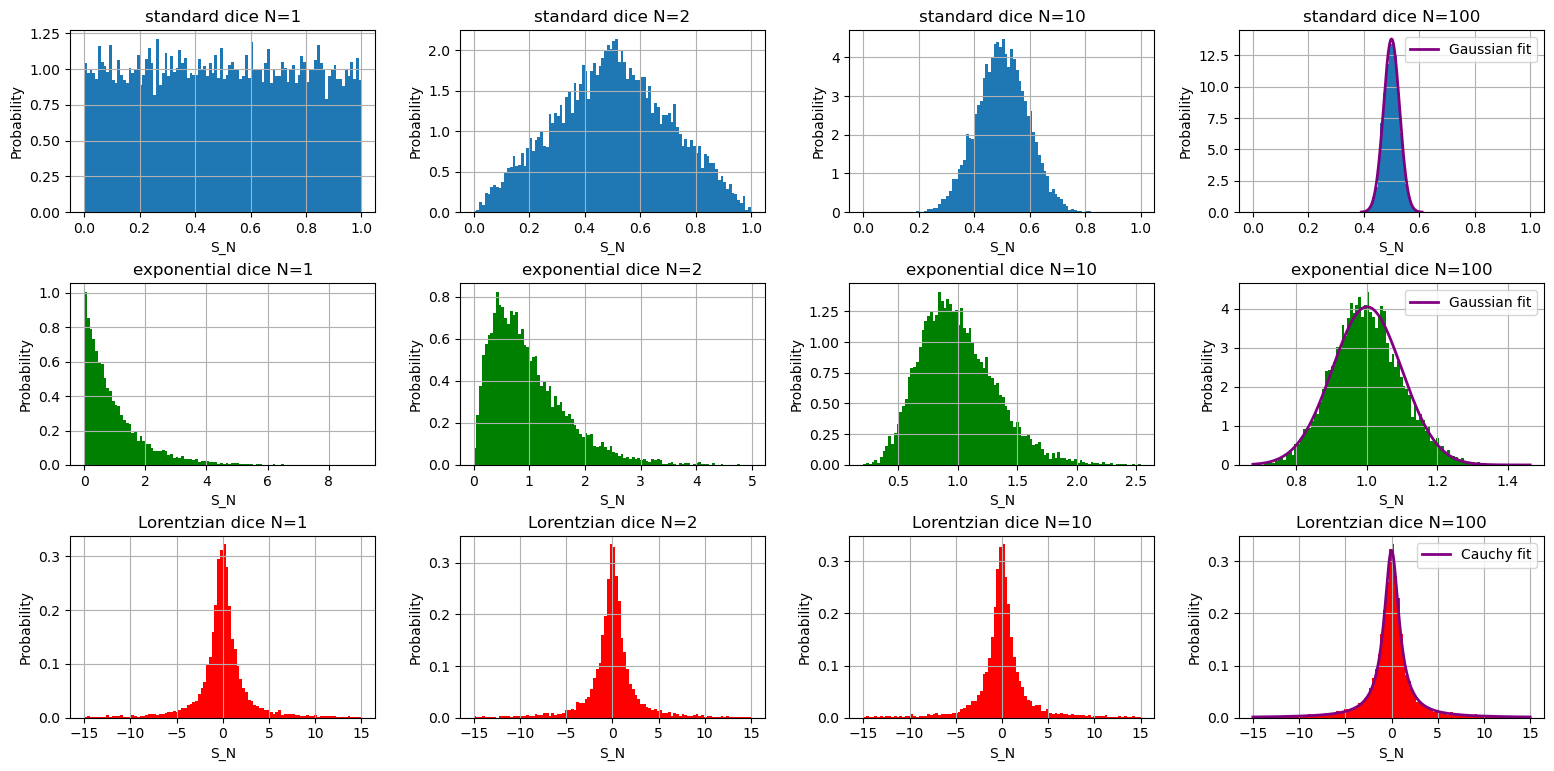

In [113]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm, cauchy

std1, std2, std10, std100 = np.loadtxt("Es2/standard.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')
exp1, exp2, exp10, exp100 = np.loadtxt("Es2/exp.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')
cauchy1, cauchy2, cauchy10, cauchy100 = np.loadtxt("Es2/cauchy.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')

n_bins = 100

fig, axes = plt.subplots(3, 4, figsize=(16,8))
fig.tight_layout(pad=3.0)

axes[0,0].hist(std1, n_bins, density=True, range=(0,1))
axes[0,0].set_xlabel('S_N')
axes[0,0].set_ylabel('Probability')
axes[0,0].set_title('standard dice N=1')
axes[0,0].grid(True)

axes[0,1].hist(std2, n_bins, density=True, range=(0,1))
axes[0,1].set_xlabel('S_N')
axes[0,1].set_ylabel('Probability')
axes[0,1].set_title('standard dice N=2')
axes[0,1].grid(True)

axes[0,2].hist(std10, n_bins, density=True, range=(0,1))
axes[0,2].set_xlabel('S_N')
axes[0,2].set_ylabel('Probability')
axes[0,2].set_title('standard dice N=10')
axes[0,2].grid(True)

mu, sigma = norm.fit(std100)
x = np.linspace(min(std100), max(std100), 1000)

axes[0,3].hist(std100, n_bins, density=True, range=(0,1))
axes[0,3].plot(x, norm.pdf(x, mu, sigma), lw=2, color='purple', label='Gaussian fit')
axes[0,3].set_xlabel('S_N')
axes[0,3].set_ylabel('Probability')
axes[0,3].set_title('standard dice N=100')
axes[0,3].legend()
axes[0,3].grid(True)

axes[1,0].hist(exp1, n_bins, density=True, facecolor='g')
axes[1,0].set_xlabel('S_N')
axes[1,0].set_ylabel('Probability')
axes[1,0].set_title('exponential dice N=1')
axes[1,0].grid(True)

axes[1,1].hist(exp2, n_bins, density=True, facecolor='g')
axes[1,1].set_xlabel('S_N')
axes[1,1].set_ylabel('Probability')
axes[1,1].set_title('exponential dice N=2')
axes[1,1].grid(True)

axes[1,2].hist(exp10, n_bins, density=True, facecolor='g')
axes[1,2].set_xlabel('S_N')
axes[1,2].set_ylabel('Probability')
axes[1,2].set_title('exponential dice N=10')
axes[1,2].grid(True)

mu, sigma = norm.fit(exp100)
x = np.linspace(min(exp100), max(exp100), 1000)

axes[1,3].hist(exp100, n_bins, density=True, facecolor='g')
axes[1,3].plot(x, norm.pdf(x, mu, sigma), lw=2, color='purple', label='Gaussian fit')
axes[1,3].set_xlabel('S_N')
axes[1,3].set_ylabel('Probability')
axes[1,3].set_title('exponential dice N=100')
axes[1,3].legend()
axes[1,3].grid(True)

axes[2,0].hist(cauchy1, n_bins, density=True, facecolor='r', range=(-15,15))
axes[2,0].set_xlabel('S_N')
axes[2,0].set_ylabel('Probability')
axes[2,0].set_title('Lorentzian dice N=1')
axes[2,0].grid(True)

axes[2,1].hist(cauchy2, n_bins, density=True, facecolor='r', range=(-15,15))
axes[2,1].set_xlabel('S_N')
axes[2,1].set_ylabel('Probability')
axes[2,1].set_title('Lorentzian dice N=2')
axes[2,1].grid(True)

axes[2,2].hist(cauchy10, n_bins, density=True, facecolor='r', range=(-15,15))
axes[2,2].set_xlabel('S_N')
axes[2,2].set_ylabel('Probability')
axes[2,2].set_title('Lorentzian dice N=10')
axes[2,2].grid(True)

x0, gamma = cauchy.fit(cauchy100)
x = np.linspace(-15, 15, 1000)

axes[2,3].hist(cauchy100, n_bins, density=True, facecolor='r', range=(-15,15))
axes[2,3].plot(x, cauchy.pdf(x, x0, gamma), lw=2, color='purple', label='Cauchy fit')
axes[2,3].set_xlabel('S_N')
axes[2,3].set_ylabel('Probability')
axes[2,3].set_title('Lorentzian dice N=100')
axes[2,3].legend()
axes[2,3].grid(True)

plt.show()

Nei primi due casi, uniforme ed esponenziale, all'aumentare di $N$ la distribuzione di $A_N$ tende a diventare una Gaussiana, in accordo con il Teorema del Limite Centrale. Nel terzo caso, invece, la distribuzione rimane una Lorentziana e questo accade perché la distribuzione di Cauchy-Lorentz, avendo varianza infinita, a differenza delle altre due non soddisfa le ipotesi del teorema. Sia la distribuzione Gaussiana che quella di Cauchy-Lorentz sono distribuzioni stabili, ossia invarianti sotto convoluzione, e proprio questa proprietà fa sì che entrambe si comportino da attrattori, ovvero distribuzioni limite di somme di variabili casuali indipendenti, nello spazio funzionale delle distribuzioni di probabilità (Teorema di Levy e Khintchine).

### <font color="blue"> Esercizio 01.3

#### Obiettivo:
Fornire una stima di $\pi$ simulando l'esperimento di Buffon.

#### Esperimento di Buffon
Un ago di lunghezza $l$ viene lanciato in modo casuale su di un piano orizzontale tagliato da linee parallele distanti $d$, con $d > l$. La probabilità $P$ che l'ago intersechi una di queste linee è: $P = \frac{2l}{\pi d}$. Perciò, se l'ago viene lanciato $M$ volte e lo si osserva cadere su una linea $N_{hit}$ volte, è possibile ottenere una stima di $\pi$ da: $$\pi = \frac{2l}{Pd} = \lim_{M \to \infty}\frac{2lM}{N_{hit}d}$$

Nella mia simulazione ho utilizzato $l=1$, $d=3$, $M=10^5$, e per valutare l'incertezza statistica ho applicato il metodo data blocking con un numero di blocchi $N=100$. Per ogni blocco, dunque, ho ottenuto una stima di $\pi$ tramite $L=10^3$ lanci dell'ago.

Per campionare l'angolo $\theta$ che si forma tra la direzione dell'ago e le linee parallele senza usare $\pi$ (è ciò che vogliamo stimare!), ho sfruttato il metodo accept/reject: ho generato due numeri casuali $x_p$ e $y_p$ distribuiti uniformemente in $\left[-1,1\right)$ accettandoli solo se $x_p^2+y_p^2<1$ e poi calcolato $\sin(\theta)=\frac{y_p}{\sqrt{x_p^2+y_p^2}}$.

Qui in basso il grafico di valor medio e incertezza progressivi in funzione del numero di lanci.

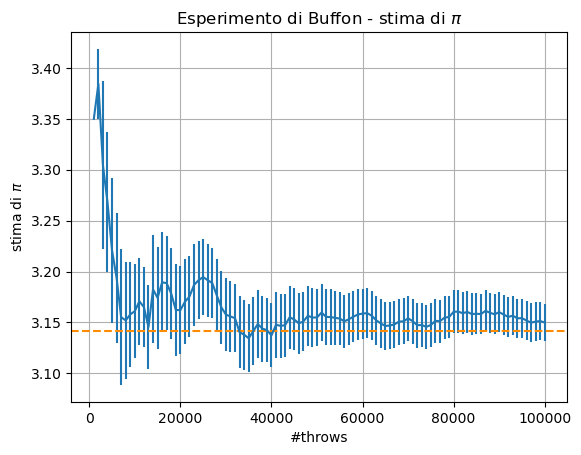

In [116]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M, N = np.loadtxt("Es3/data.dat", max_rows=1, usecols=(0,1), delimiter=' ', unpack='true')
L = int(M/N)
x = np.arange(N)+1
x *= L

sum_prog, err_prog = np.loadtxt("Es3/data.dat", skiprows=1, usecols=(0,1), delimiter=' ', unpack='true')
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.axhline(y=np.pi, color='darkorange', linestyle='--')
plt.xlabel('#throws')
plt.ylabel(r'stima di $\pi$')
plt.title(r'Esperimento di Buffon - stima di $\pi$')
plt.grid(True)
plt.show()

Osserviamo che, all'aumentare del numero di lanci, la nostra stima tende a stabilizzarsi correttamente attorno al valore vero indicato dalla linea tratteggiata.